In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


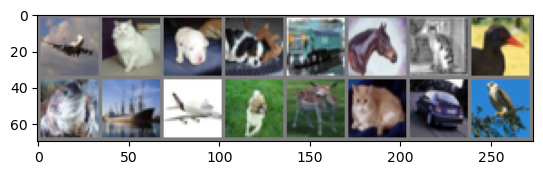

plane cat   dog   dog   truck horse cat   bird  frog  ship  plane dog   deer  cat   car   bird 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    """Model (simple CNN adapted from 'PyTorch: A 60 Minute Blitz')"""

    def __init__(self) -> None:
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.137
[2,  2000] loss: 1.580
[3,  2000] loss: 1.416
[4,  2000] loss: 1.312
[5,  2000] loss: 1.219
[6,  2000] loss: 1.151
[7,  2000] loss: 1.083
[8,  2000] loss: 1.033
[9,  2000] loss: 0.981
[10,  2000] loss: 0.945
[11,  2000] loss: 0.902
[12,  2000] loss: 0.865
[13,  2000] loss: 0.827
[14,  2000] loss: 0.800
[15,  2000] loss: 0.773
[16,  2000] loss: 0.744
[17,  2000] loss: 0.724
[18,  2000] loss: 0.687
[19,  2000] loss: 0.656
[20,  2000] loss: 0.639
[21,  2000] loss: 0.625
[22,  2000] loss: 0.594
[23,  2000] loss: 0.568
[24,  2000] loss: 0.552
[25,  2000] loss: 0.531
[26,  2000] loss: 0.514
[27,  2000] loss: 0.504
[28,  2000] loss: 0.486
[29,  2000] loss: 0.467
[30,  2000] loss: 0.449
[31,  2000] loss: 0.435
[32,  2000] loss: 0.429
[33,  2000] loss: 0.405
[34,  2000] loss: 0.392
[35,  2000] loss: 0.384
[36,  2000] loss: 0.376
[37,  2000] loss: 0.363
[38,  2000] loss: 0.348
[39,  2000] loss: 0.350
[40,  2000] loss: 0.327
[41,  2000] loss: 0.330
[42,  2000] loss: 0.322
[

In [7]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
